In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
def calc_sec(time):
    hms = time.split(':')
    hms = [float(x) for x in hms]
    sec = hms[2] + hms[1]*60 + hms[0]*3600
    sec = round(sec,3)
    return sec

In [34]:
def calc_ts(sec):
    ts = ''
    hr = int(sec/3600)
    mn = int((sec - (hr*3600))/60)
    sc = sec - (hr*3600) - (mn*60)
    sc = round(sc,3)
    ts += str(hr) + ':' + str(mn) + ':' + str(sc)
    # print(ts)
    return ts

In [35]:
def calc_t_period(dates,secs):
    t_period = []
    
    start_sec = secs[0]
    prev_sec = secs[0]
    prev_date = dates[0]

    for i in range(len(secs)):
        curr_sec = secs[i]
        diff_sec = curr_sec - prev_sec
        curr_date = dates[i]
        
        if((diff_sec>3.0) and (curr_date==prev_date)):
            t_period.append([curr_date,start_sec,prev_sec])
            start_sec = curr_sec
        elif(curr_date!=prev_date):
            t_period.append([prev_date,start_sec,prev_sec])
            start_sec = curr_sec
            prev_date = curr_date
        elif(i==len(secs)-1):
            t_period.append([curr_date,start_sec,curr_sec])

        prev_sec = curr_sec
    
    return t_period

In [36]:
def equation_bai(X_i):
    all_std = []
    
    std_i = np.std(X_i,axis=0)
    diff_std = std_i**2 - std_i_bar**2
    diff_std = (diff_std + 1) / (std_i_bar**2 + 1)
    
    diff_std_ = std_i**2

    all_std.append(diff_std)
    
    all_std = np.array(all_std)
    
    ai = np.sum(all_std**2,axis=1)/3
    ai[ai<0] = 0
    ai = np.sqrt(ai)
    
    return ai

In [37]:
std_i_bar = [0.00349329,0.00465817,0.00543154]
std_i_bar = np.array(std_i_bar)

In [38]:
rec_date = '2019-01-04'
start_time = '11:37:01'
end_time = '11:42:13'

# rec_date = '2016-01-01'
# start_time = '07:42:14'
# end_time = '07:47:01'

# rec_date = '2018-12-19'
# start_time = '16:17:05'
# end_time = '16:21:55'

In [39]:
filepath = 'SmartwatchData/raw_data/log_acc_ped.csv'
df = pd.read_csv(filepath)
filtered = [i for i in df['timestamp'] if i[:10]==rec_date and calc_sec(i[11:])>calc_sec(start_time) 
            and calc_sec(i[11:])<calc_sec(end_time)]

df_filt = df[df['timestamp'].isin(filtered)]
df_filt = df_filt.reset_index(drop=True)

cols = ['timestamp','x','y','z']
df_filt = df_filt[cols]

df_filt

,timestamp,x,y,z
0,2019-01-04 11:37:01.695,2.595315,-1.598130,8.974665
1,2019-01-04 11:37:01.854,2.394202,-1.564611,9.396045
2,2019-01-04 11:37:02.012,2.375048,-2.033874,9.396045
3,2019-01-04 11:37:02.172,1.929727,-1.665167,9.496601
4,2019-01-04 11:37:02.334,1.948880,-1.588553,9.463082
5,2019-01-04 11:37:02.493,1.824382,-1.511938,9.534908
6,2019-01-04 11:37:02.656,1.781286,-1.080982,9.491813
7,2019-01-04 11:37:02.817,1.800440,-1.100136,9.640253
8,2019-01-04 11:37:02.975,1.848324,-1.243788,9.692925
9,2019-01-04 11:37:03.136,1.833958,-1.200692,9.678560


In [40]:
filepath = 'SmartwatchData/raw_data/log_hr_ped.csv'
df2 = pd.read_csv(filepath)

filtered = [i for i in df2['timestamp'] if i[:10]==rec_date and calc_sec(i[11:])>calc_sec(start_time) 
            and calc_sec(i[11:])<calc_sec(end_time)]

df_hr = df2[df2['timestamp'].isin(filtered)]
df_hr = df_hr.reset_index(drop=True)

cols = ['timestamp','hr']
df_hr = df_hr[cols]

df_hr

,timestamp,hr
0,2019-01-04 11:37:02.885,44.915390
1,2019-01-04 11:37:03.985,44.522160
2,2019-01-04 11:37:05.084,44.801346
3,2019-01-04 11:37:06.166,45.768826
4,2019-01-04 11:37:07.267,51.309372
5,2019-01-04 11:37:08.368,54.079643
6,2019-01-04 11:37:09.452,55.464783
7,2019-01-04 11:37:10.567,52.865273
8,2019-01-04 11:37:11.647,51.565514
9,2019-01-04 11:37:12.745,50.771970


In [41]:
hr_cnt = 0

for i in range(len(df_filt)):
    hr_time = df_hr.loc[hr_cnt,'timestamp'].split(' ')[1]
    filt_time = df_filt.loc[i,'timestamp'].split(' ')[1]
    
    if(calc_sec(hr_time)<=calc_sec(filt_time)):
        if(hr_cnt<len(df_hr)-1):
            hr_cnt += 1
    df_filt.loc[i,'HR'] = df_hr.loc[hr_cnt,'hr']

In [42]:
df_filt

,timestamp,x,y,z,HR
0,2019-01-04 11:37:01.695,2.595315,-1.598130,8.974665,44.915390
1,2019-01-04 11:37:01.854,2.394202,-1.564611,9.396045,44.915390
2,2019-01-04 11:37:02.012,2.375048,-2.033874,9.396045,44.915390
3,2019-01-04 11:37:02.172,1.929727,-1.665167,9.496601,44.915390
4,2019-01-04 11:37:02.334,1.948880,-1.588553,9.463082,44.915390
5,2019-01-04 11:37:02.493,1.824382,-1.511938,9.534908,44.915390
6,2019-01-04 11:37:02.656,1.781286,-1.080982,9.491813,44.915390
7,2019-01-04 11:37:02.817,1.800440,-1.100136,9.640253,44.915390
8,2019-01-04 11:37:02.975,1.848324,-1.243788,9.692925,44.522160
9,2019-01-04 11:37:03.136,1.833958,-1.200692,9.678560,44.522160


In [43]:
cols = df_filt.columns.tolist()

row_len = len(df_filt.index)

dates = [df_filt.iloc[i,0].split(' ')[0] for i in range(row_len)]
secs = [calc_sec(df_filt.iloc[i,0].split(' ')[1]) for i in range(row_len)]

period = calc_t_period(dates,secs)

ts = []
for elem in period:
    ts.append([elem[0],calc_ts(elem[1]),calc_ts(elem[2])])
    
ts = np.array(ts)
print(ts)

[['2019-01-04' '11:37:1.695' '11:42:12.762']]


In [44]:
ts1 = [i for i in df_filt['timestamp'] if calc_sec(i[11:])<=calc_sec(ts[0][2])]
df1 = df_filt[df_filt['timestamp'].isin(ts1)]

g = 9.8
df1.loc[:,'x'] = df1['x'].apply(lambda x: x/g)
df1.loc[:,'y'] = df1['y'].apply(lambda x: x/g)
df1.loc[:,'z'] = df1['z'].apply(lambda x: x/g)

# plotted = df1.plot(color=('r','g','b'),figsize=(16,6)).legend(loc='upper right')

# fig = plotted.get_figure()
# fig.savefig('testrun_indy_RH_acc_19-12-18.png')

In [45]:
H = 10
ai1 = []

for i in range(len(df1)):
    xyz_val = []
    if(i-H>=0):
        for j in range(H,0,-1):
            xyz_val.append([df1.iloc[i-j,1],df1.iloc[i-j,2],df1.iloc[i-j,3]])
        ai_val = float(equation_bai(xyz_val))
        ai1.append(ai_val)
    else:
        ai1.append(1)

In [46]:
df1['AI'] = pd.Series(ai1)

df1

,timestamp,x,y,z,HR,AI
0,2019-01-04 11:37:01.695,0.264828,-0.163074,0.915782,44.915390,1.000000
1,2019-01-04 11:37:01.854,0.244306,-0.159654,0.958780,44.915390,1.000000
2,2019-01-04 11:37:02.012,0.242352,-0.207538,0.958780,44.915390,1.000000
3,2019-01-04 11:37:02.172,0.196911,-0.169915,0.969041,44.915390,1.000000
4,2019-01-04 11:37:02.334,0.198865,-0.162097,0.965621,44.915390,1.000000
5,2019-01-04 11:37:02.493,0.186161,-0.154279,0.972950,44.915390,1.000000
6,2019-01-04 11:37:02.656,0.181764,-0.110304,0.968552,44.915390,1.000000
7,2019-01-04 11:37:02.817,0.183718,-0.112259,0.983699,44.915390,1.000000
8,2019-01-04 11:37:02.975,0.188604,-0.126917,0.989074,44.522160,1.000000
9,2019-01-04 11:37:03.136,0.187139,-0.122520,0.987608,44.522160,1.000000


In [47]:
ts_ = []
labels = []

with open('times5.txt','r') as f:
    for line in f:
        t = line.strip('\n').split('\t')
        ts_.append(float(t[0]))
        labels.append(t[1])

accum = 0
ts = []
for x in ts_:
    accum += x
    ts.append(round(accum,2))

lb_set = set()
for x in labels:
    lb_set.add(x)

lb_ = list(lb_set)

set_cnt = []
for i in range(len(lb_)):
    set_cnt.append(0)

lb = []
lb.append('NaN')

for x in labels:
    for i in range(len(lb_)):
        if(lb_[i]==x and set_cnt[i]!=1 and lb_[i]!='NaN'):
            set_cnt[i] = 1
            lb.append(x)

colors = ['#808080', '#E6194B', '#3CB44B', '#FFE119', '#4363D8', '#F58231',
          '#911EB4', '#46F0F0', '#F032E6', '#BCF60C', '#008080', '#E6BEFF', 
          '#9A6324', '#800000', '#AAFFC3', '#808000', '#000075']

color_dict = {}
for i in range(len(lb)):
    color_dict[lb[i]] = colors[i]
    
print(color_dict)

lb_color = []
for x in labels:
    lb_color.append(color_dict[x])

print(lb_color)
print(len(lb_color))
print(ts)

{'NaN': '#808080', 'stand': '#E6194B', 'sit': '#3CB44B', 'lay down': '#FFE119', 'walk': '#4363D8'}
['#E6194B', '#3CB44B', '#E6194B', '#808080', '#FFE119', '#3CB44B', '#FFE119', '#E6194B', '#808080', '#4363D8', '#808080']
11
[31.18, 62.89, 94.6, 105.55, 141.63, 172.37, 204.32, 235.43, 246.59, 293.65, 312.67]


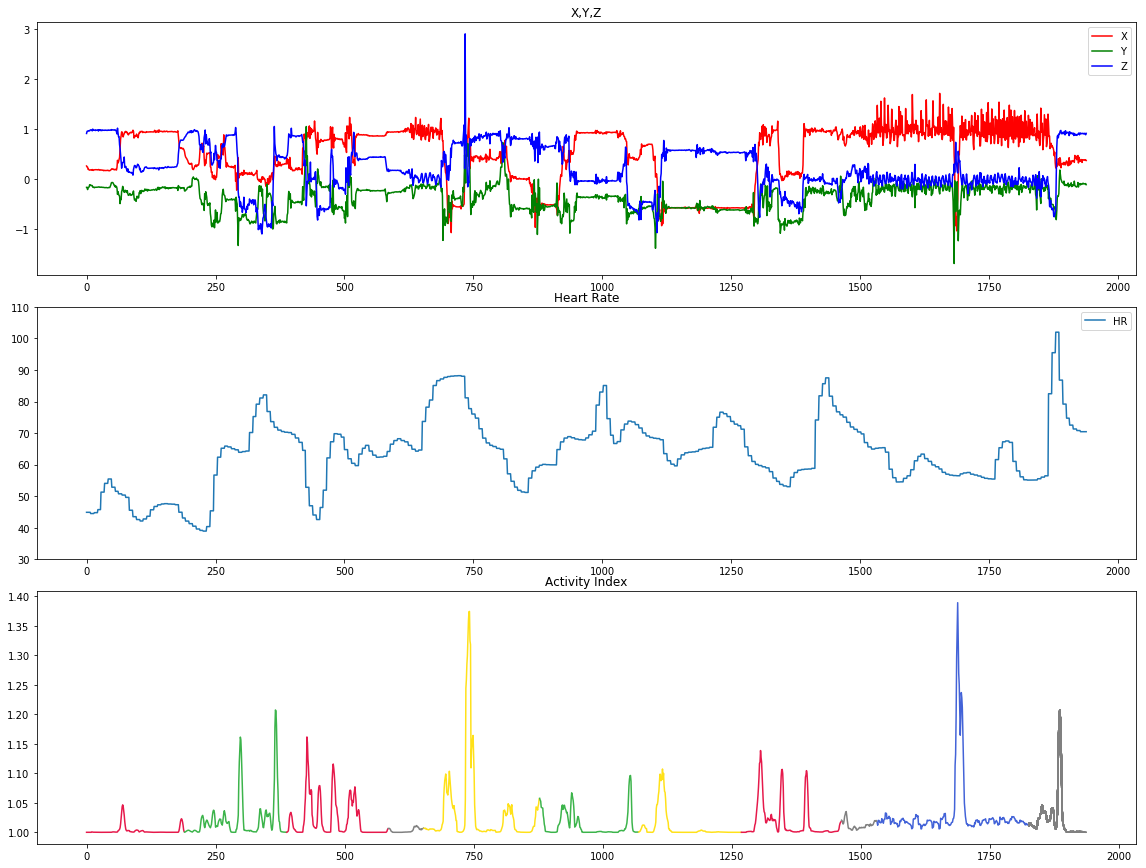

<Figure size 1080x3600 with 0 Axes>

In [48]:
dict1 = df1.to_dict(orient='list')

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16,12))
fig.tight_layout()

ts_cnt = 0
x_axis = []
y_ai = []

ax = axes[0]
ax.plot(dict1['x'],color='r',label='X')
ax.plot(dict1['y'],color='g',label='Y')
ax.plot(dict1['z'],color='b',label='Z')
ax.legend(loc='upper right')
ax.set_title('X,Y,Z')

ax = axes[1]
ax.plot(dict1['HR'],label='HR')
ax.set_ylim(bottom=30,top=110)
ax.legend(loc='upper right')
ax.set_title('Heart Rate')

ax = axes[2]
for i in range(len(dict1['timestamp'])):
    if(dict1['AI'][i]>0):
        if(calc_sec(dict1['timestamp'][i].split(' ')[1])>calc_sec(start_time)+ts[ts_cnt]):
            ax.plot(x_axis,y_ai,color=lb_color[ts_cnt])
            ts_cnt += 1
            x_axis = []
            y_ai = []
            
        elif(ts_cnt==len(lb_color)-1):
            ax.plot(x_axis,y_ai,color=lb_color[ts_cnt])
            
        x_axis.append(i)
        y_ai.append(dict1['AI'][i])

ax.set_title('Activity Index')


plt.figure(figsize=(15,50))
# fig.savefig('testrun_ped_lh.png', dpi = 300)

plt.show()

In [140]:
from statsmodels import robust

0.9684545851020407 0.16158269136895687
0.09707209432615857


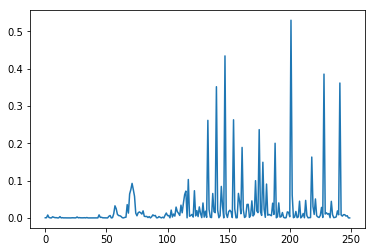

In [150]:
sub_x_1 = dict1['x'][250:500]
sub_x_2 = dict1['x'][1400:1650]
mean_x_2 = np.mean(sub_x_2)
sd_x_2 = np.std(sub_x_2)
etp = robust.mad(sub_x_2)

plt.plot((sub_x_2-mean_x_2)**2)

print(mean_x_2, sd_x_2)
print(etp)

In [49]:
class Seq:
    def __init__(self,s,f):
        self.s = s
        self.f = f

In [50]:
ki = -1
kj = -1
s = []
sd_thres = 0.007

for i in range(0,len(a1)-1):
    if(not(len(s)!=0 and s[-1].s==ki and s[-1].f==kj)):
        s.append(Seq(ki,kj))
    for j in range(1,len(a1)):
        if(j-i>=50):
            if(np.std(a1[i:j])<sd_thres):
                kj = j
                ki = i

In [51]:
seq = []
for i in range(len(a1)):
    seq.append(i)
    
sequence = []
for x in s:
    if(x.s in seq and x.f in seq):
        for i in range(x.s,x.f+1):
            seq.remove(i)
        sequence.append(x)

for x in sequence:
    print(x.s,x.f)

0 69
71 224
523 690
752 807
945 1049
1122 1299
1399 1470
1471 1682
1701 1854


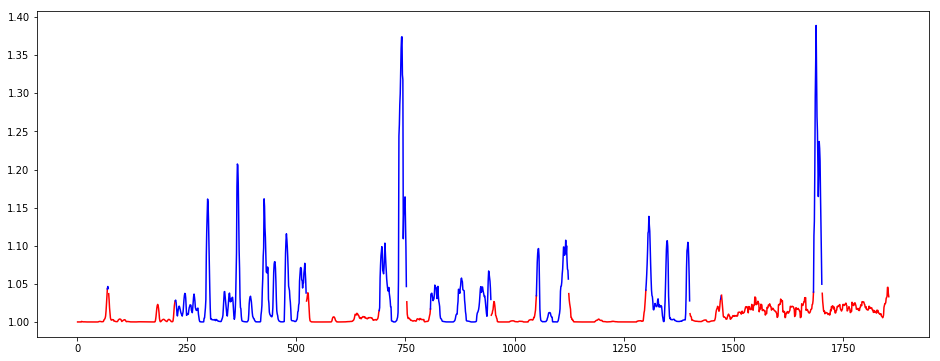

In [52]:
x_axis = []
y_axis = []
seq_idx = 0

fig = plt.figure(figsize=(16,6))

for i in range(len(a1)):
    if(seq_idx<len(sequence) and i>=sequence[seq_idx].s and i<=sequence[seq_idx].f):
#         print('r',i)
        x_axis.append(i)
        y_axis.append(a1[i])
    
    if(seq_idx<len(sequence) and i==sequence[seq_idx].f):
        plt.plot(x_axis,y_axis,color='r')
        x_axis = []
        y_axis = []
        seq_idx += 1
        
    if(seq_idx<len(sequence) and i<=sequence[seq_idx].s):
#         print('b++',i)
        x_axis.append(i)
        y_axis.append(a1[i])
    
    if(seq_idx<len(sequence) and i==sequence[seq_idx].s):
        plt.plot(x_axis,y_axis,color='b')
        x_axis = []
        y_axis = []
    
    
# fig.savefig('Ped_red_blue.png')
plt.show()

In [53]:
sub_arr_1 = a1[71:224]
std1 = np.std(sub_arr_1)

sub_arr_2 = a1[0:150]
std2 = np.std(sub_arr_2)

sub_arr_3 = a1[1500:1900]
std3 = np.std(sub_arr_3)

print(std1,std2,std3)

0.006856659751674304 0.008057222815565347 0.04956621309464292


In [54]:
import pywt
from pywt import wavedec

In [55]:
(cA, cD) = pywt.dwt(ai1,'db3')
coeffs = wavedec(ai1,'db3',level=3)
cA3, cD3, cD2, cD1 = coeffs

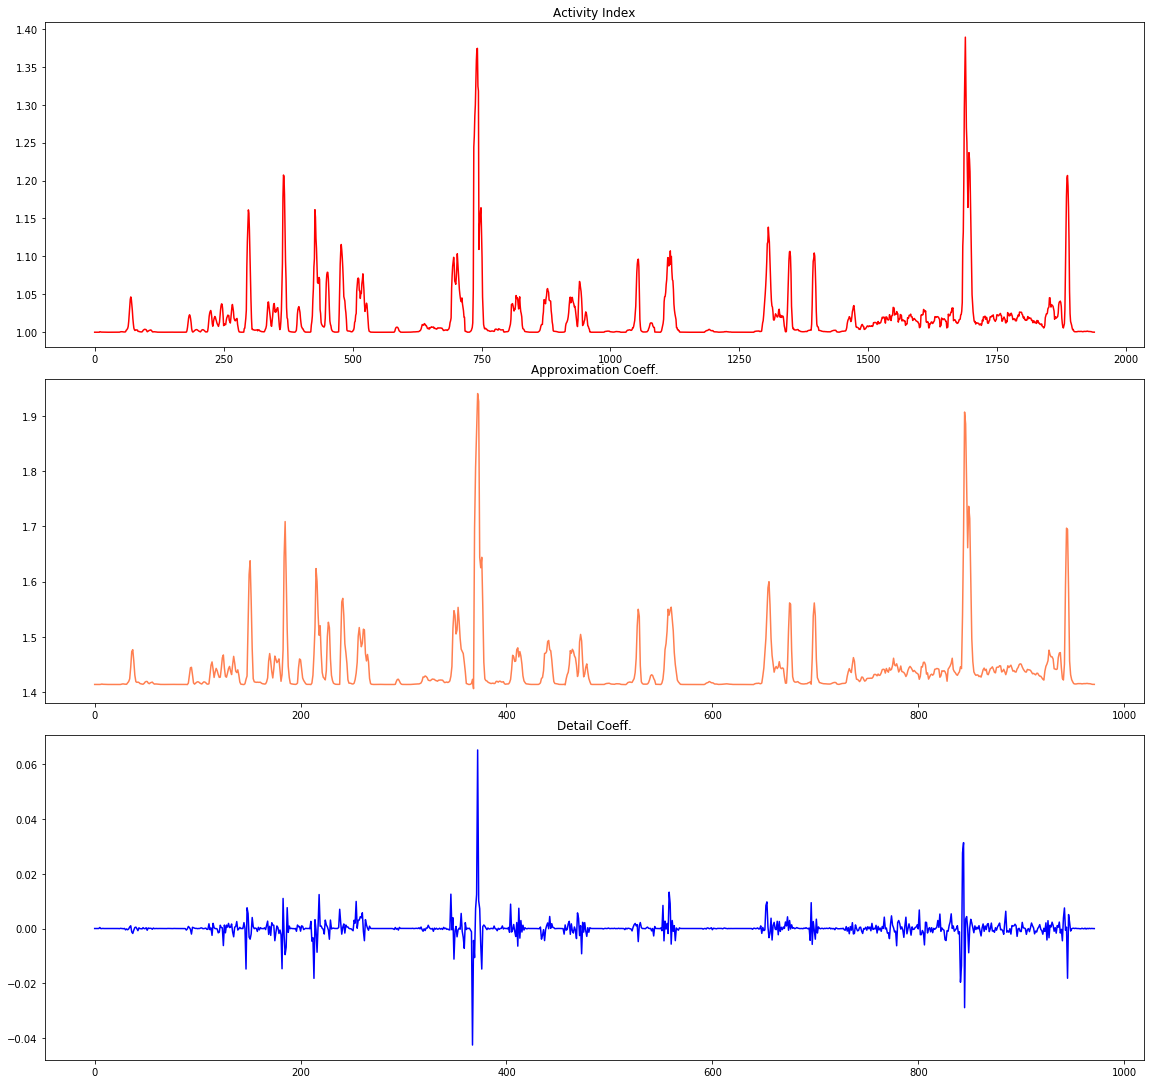

In [56]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16,15))
fig.tight_layout()

ax = axes[0]
ax.plot(ai1,'r')
ax.set_title('Activity Index')

ax = axes[1]
ax.plot(cA,'#FF7F50')
ax.set_title('Approximation Coeff.')

ax = axes[2]
ax.plot(cD,'b')
ax.set_title('Detail Coeff.')

plt.show()
# fig.savefig('testrun_indy_lh_wavelet.png',dpi=300)

In [67]:
a1 = np.array(ai1)
N = a1.shape[0]
# t = np.arange(120)
# a1 = np.sin(t) + np.sin(2*t)

T = 0.16
x_ = np.linspace(1/(T*(N-1)), 1/T, N-1)

ft = np.fft.fft(a1)

print(ft)
print(ft.real[1:].shape)
print(ft.imag)

print(x.shape)
print(a1.shape)

[ 1.97631356e+03+0.j          7.76200237e-01-1.48612922j
 -3.21772378e+00+8.60471324j ... -3.55300965e+00-3.21656776j
 -3.21772378e+00-8.60471324j  7.76200237e-01+1.48612922j]
(1938,)
[ 0.         -1.48612922  8.60471324 ... -3.21656776 -8.60471324
  1.48612922]
(1939,)
(1939,)


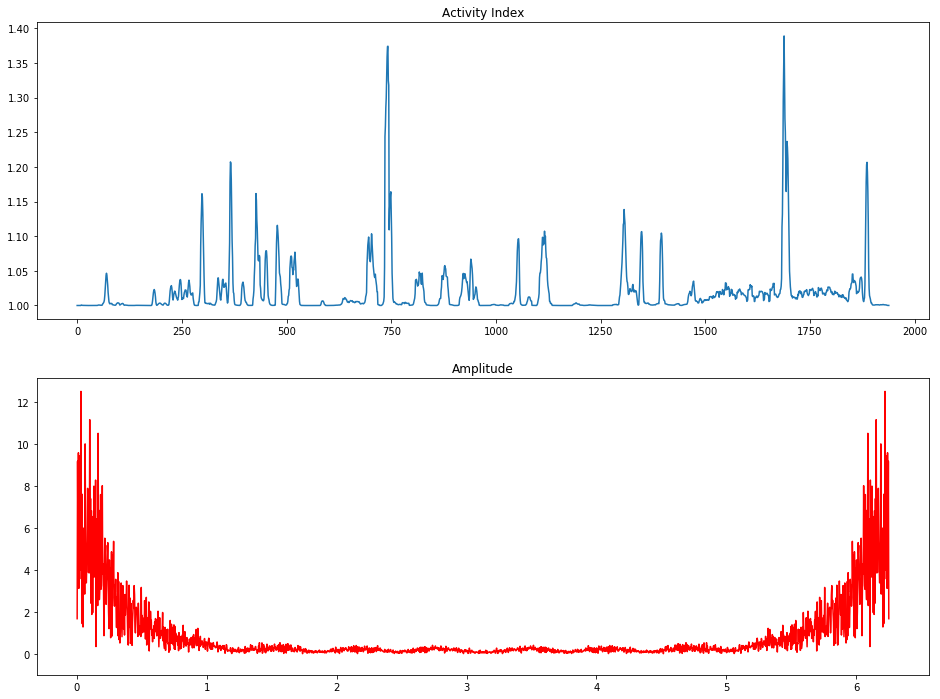

In [94]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16,12))

ax = axes[0]
ax.plot(a1)
ax.set_title('Activity Index')

ax = axes[1]
ax.plot(x_,np.abs(ft)[1:len(ft)],color='r')
ax.set_ylim(bottom=-1)
ax.set_title('Amplitude')

# ax = axes[2]
# ax.plot(x,ft.imag[1:],'b')
# ax.set_title('Imaginary Part')

plt.show()
# fig.savefig('testrun_indy_lh_fft.png',dpi=300)

[0.0125632  0.01271385 0.0129001  ... 0.01358463 0.01335284 0.01284317]


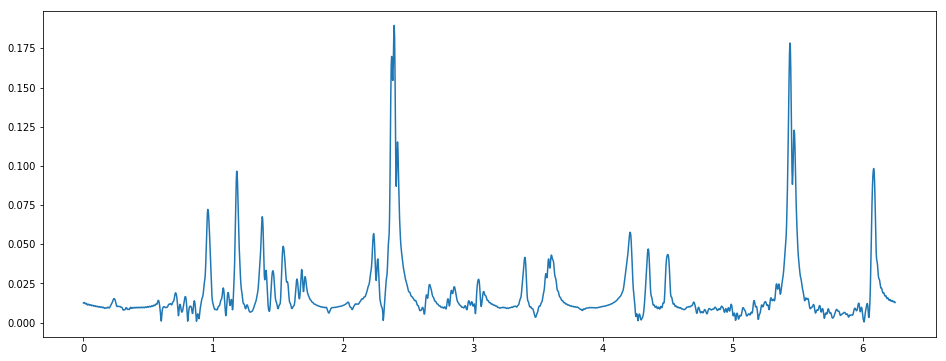

In [92]:
x = np.linspace(0, 1/T, N)

lo_mask = np.where(x>1)
med_mask = np.where((x-1)*(x-5)>=0)
hi_mask = np.where(x<5)

pos_mask = hi_mask

med_freq_fft = ft.copy()
# med_freq_fft[np.abs(x) < 1] = 0
med_freq_fft[pos_mask] = 0
filtered_sig = np.fft.ifft(med_freq_fft)

print(np.abs(filtered_sig))

plt.figure(figsize=(16,6))
plt.plot(x,np.abs(filtered_sig))

plt.savefig('mask_highpass.png',dpi=300)